# Least square method

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_circles
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

We start by measuring the distance between points and the regression line. These distances are here in red dashes

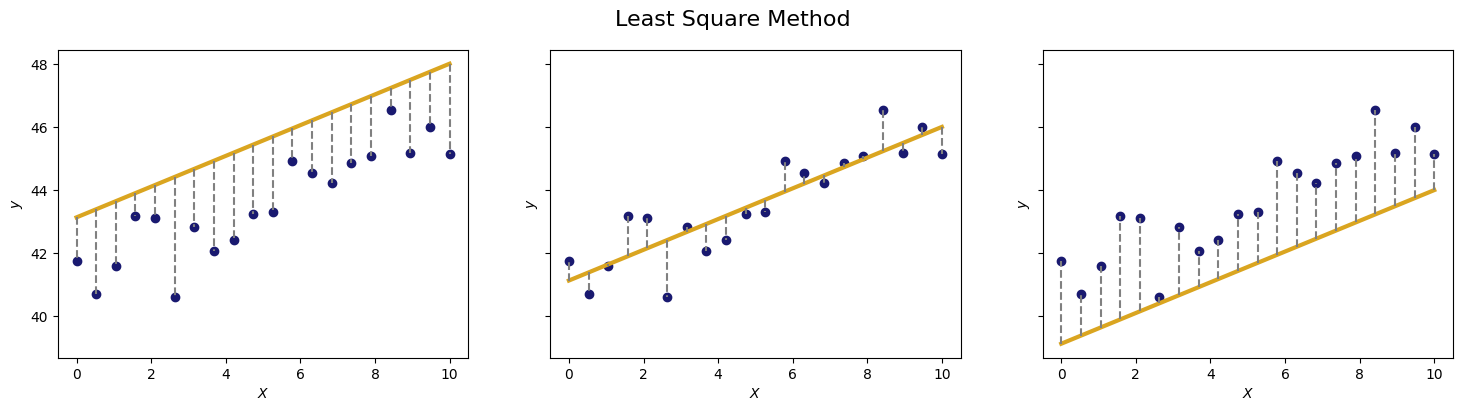

In [5]:
np.random.seed(0)

m = 20
X = np.linspace(0, 10, m)
y = 0.6 * X + 40 + np.random.randn(m)

model = LinearRegression().fit(X.reshape(-1,1), y.reshape(-1,1))
preds = model.predict(X.reshape(-1,1))

fig, ax = plt.subplots(1, 3, figsize=(18, 4), sharey=True)
fig.suptitle("Least Square Method", fontsize=16)
list_bias = [2, 0, -2]
for i, bias in enumerate(list_bias):
    ax[i].scatter(X, y, color='midnightblue')
    ax[i].plot(X, preds + bias, color='goldenrod', lw = 3)
    ax[i].vlines(x=X, ymin=preds + bias, ymax = y, color='gray', ls='--')
    ax[i].set_xlabel('$X$')
    ax[i].set_ylabel('$y$')
    
plt.show()

Let's see the evolution of the Mean Square Error by evolving each parameters individually 

/tmp/ipykernel_5225/109509163.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[1].scatter(model.coef_ + coef, L, c=c)


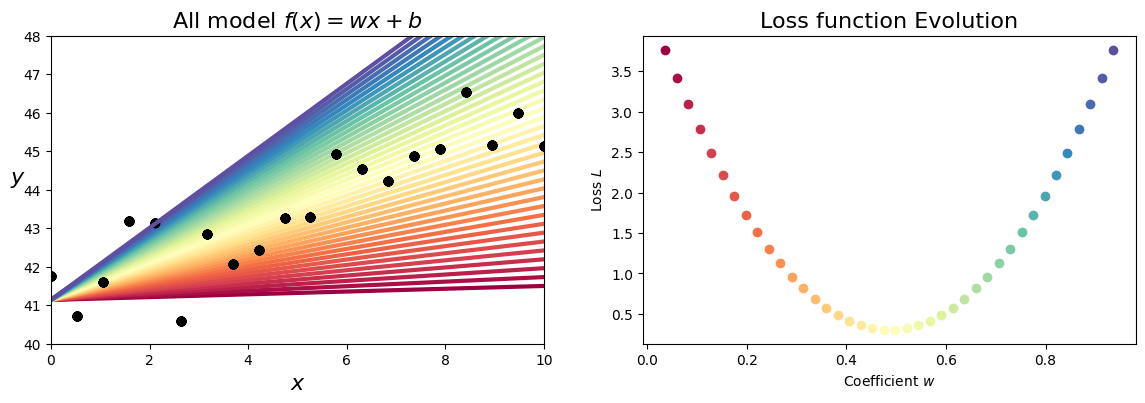

In [6]:
np.random.seed(0)

m = 20
X = np.linspace(0, 10, m)
y = 0.6 * X + 40 + np.random.randn(m)

model = LinearRegression().fit(X.reshape(-1, 1), y.reshape(-1, 1))
# preds = model.predict(X.reshape(-1, 1))

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
list_coefs = np.linspace(-0.45, 0.45, 40)

color = iter(plt.cm.Spectral(np.linspace(0, 1, len(list_coefs))))

for coef in list_coefs:
    pred = X * (model.coef_ + coef) + model.intercept_
    pred = pred.squeeze()
    c = next(color)
    ax[0].scatter(X, y, color='k', zorder = -1)
    ax[0].plot(X, pred, c=c, lw=3, alpha=1, zorder=-1)
    ax[0].set_xlabel('$x$', fontsize = 16)
    ax[0].set_ylabel('$y$', fontsize=16, rotation=0)
    ax[0].set_xlim(0, 10)
    ax[0].set_ylim(40,48)
    
    L = 1/(2*m) * np.sum((y - pred) ** 2)  # MSE
    ax[1].scatter(model.coef_ + coef, L, c=c)
    ax[1].set_xlabel('Coefficient $w$')
    ax[1].set_ylabel('Loss $L$')

ax[0].set_title('All model $f(x) = w x + b$', fontsize=16)
ax[1].set_title('Loss function Evolution', fontsize=16)

plt.show()

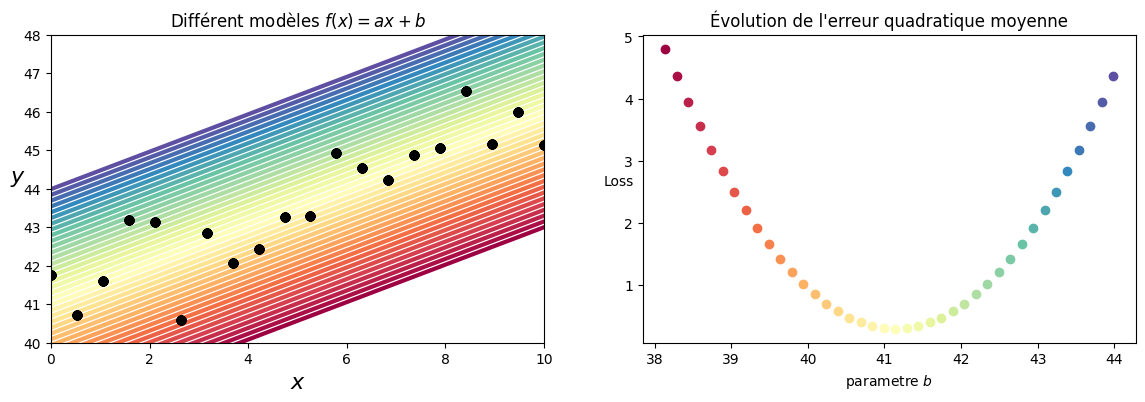

In [7]:
np.random.seed(0)

m = 20
X = np.linspace(0, 10, m)
y = 0.6 * X + 40 + np.random.randn(m)

model = LinearRegression().fit(X.reshape(-1, 1), y.reshape(-1, 1))
# preds = model.predict(X.reshape(-1, 1))  

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
list_bias = np.arange(-3, 3, 0.15)

color = iter(plt.cm.Spectral(np.linspace(0, 1, len(list_bias))))

for bias in list_bias:
  pred = X * model.coef_+ model.intercept_ + bias
  pred = pred.squeeze()
  c = next(color)
  ax[0].scatter(X, y, c='k', zorder=1)
  ax[0].plot(X, pred, c=c, lw=3, alpha=1, zorder=-1)
  ax[0].set_xlabel('$x$', fontsize=16)
  ax[0].set_ylabel('$y$', fontsize=16, rotation=0)
  ax[0].set_xlim(0, 10)
  ax[0].set_ylim(40, 48)

  L = 1/(2*m) * np.sum((pred - y)**2)
  ax[1].scatter(model.intercept_ + bias, L, color=c)
  ax[1].set_xlabel('parametre $b$')
  ax[1].set_ylabel('Loss', rotation=0)

ax[0].set_title('Différent modèles $f(x) = a x + b$')
ax[1].set_title('Évolution de l\'erreur quadratique moyenne')

plt.show()